In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
df = pd.read_csv('subset-covid-data.csv')
df

,country,continent,date,day,month,year,cases,deaths,country_code,population
0,Afghanistan,Asia,2020-04-12,12,4,2020,34,3,AFG,37172386.0
1,Albania,Europe,2020-04-12,12,4,2020,17,0,ALB,2866376.0
2,Algeria,Africa,2020-04-12,12,4,2020,64,19,DZA,42228429.0
3,Andorra,Europe,2020-04-12,12,4,2020,21,2,AND,77006.0
4,Angola,Africa,2020-04-12,12,4,2020,0,0,AGO,30809762.0
...,...,...,...,...,...,...,...,...,...,...
201,Venezuela,America,2020-04-12,12,4,2020,0,0,VEN,28870195.0
202,Vietnam,Asia,2020-04-12,12,4,2020,4,0,VNM,95540395.0
203,Yemen,Asia,2020-04-12,12,4,2020,0,0,YEM,28498687.0
204,Zambia,Africa,2020-04-12,12,4,2020,0,0,ZMB,17351822.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country       206 non-null    object 
 1   continent     206 non-null    object 
 2   date          206 non-null    object 
 3   day           206 non-null    int64  
 4   month         206 non-null    int64  
 5   year          206 non-null    int64  
 6   cases         206 non-null    int64  
 7   deaths        206 non-null    int64  
 8   country_code  202 non-null    object 
 9   population    202 non-null    float64
dtypes: float64(1), int64(5), object(4)
memory usage: 16.2+ KB


In [4]:
df.shape

(206, 10)

In [5]:
df.date.value_counts()

2020-04-12    204
2020-01-18      1
2020-04-11      1
Name: date, dtype: int64

In [6]:
df.cases.mean()

395.247572815534

In [7]:
df.cases.median()

11.5

In [8]:
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)
df

,country,continent,date,day,month,year,cases,deaths,country_code,population
0,Afghanistan,Asia,2020-04-12,12,4,2020,34,3,AFG,37172386.0
1,Albania,Europe,2020-04-12,12,4,2020,17,0,ALB,2866376.0
2,Algeria,Africa,2020-04-12,12,4,2020,64,19,DZA,42228429.0
3,Andorra,Europe,2020-04-12,12,4,2020,21,2,AND,77006.0
4,Angola,Africa,2020-04-12,12,4,2020,0,0,AGO,30809762.0
...,...,...,...,...,...,...,...,...,...,...
201,Venezuela,America,2020-04-12,12,4,2020,0,0,VEN,28870195.0
202,Vietnam,Asia,2020-04-12,12,4,2020,4,0,VNM,95540395.0
203,Yemen,Asia,2020-04-12,12,4,2020,0,0,YEM,28498687.0
204,Zambia,Africa,2020-04-12,12,4,2020,0,0,ZMB,17351822.0


In [9]:
same_cases = df[df.date == '2020-04-12']
same_cases

,country,continent,date,day,month,year,cases,deaths,country_code,population
0,Afghanistan,Asia,2020-04-12,12,4,2020,34,3,AFG,37172386.0
1,Albania,Europe,2020-04-12,12,4,2020,17,0,ALB,2866376.0
2,Algeria,Africa,2020-04-12,12,4,2020,64,19,DZA,42228429.0
3,Andorra,Europe,2020-04-12,12,4,2020,21,2,AND,77006.0
4,Angola,Africa,2020-04-12,12,4,2020,0,0,AGO,30809762.0
...,...,...,...,...,...,...,...,...,...,...
201,Venezuela,America,2020-04-12,12,4,2020,0,0,VEN,28870195.0
202,Vietnam,Asia,2020-04-12,12,4,2020,4,0,VNM,95540395.0
203,Yemen,Asia,2020-04-12,12,4,2020,0,0,YEM,28498687.0
204,Zambia,Africa,2020-04-12,12,4,2020,0,0,ZMB,17351822.0


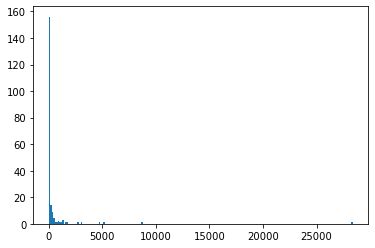

In [10]:
plt.hist(same_cases.cases,bins=200)
plt.show()

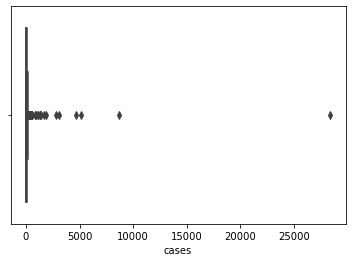

In [11]:
sns.boxplot(x = same_cases.cases)
plt.show()

In [12]:
df.groupby('continent')['cases','deaths'].sum()

C:\Users\playt\AppData\Local\Temp\ipykernel_15064\2990098081.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby('continent')['cases','deaths'].sum()


,cases,deaths
continent,,
Africa,714,52
America,33519,2111
Asia,12979,383
Europe,34141,3571
Oceania,68,4


In [13]:
df.sort_values('cases',ascending = False).head(5)

,country,continent,date,day,month,year,cases,deaths,country_code,population
198,United_States_of_America,America,2020-04-12,12,4,2020,28391,1831,USA,327167434.0
195,United_Kingdom,Europe,2020-04-12,12,4,2020,8719,839,GBR,66488991.0
190,Turkey,Asia,2020-04-12,12,4,2020,5138,95,TUR,82319724.0
98,Italy,Europe,2020-04-12,12,4,2020,4694,619,ITA,60431283.0
177,Spain,Europe,2020-04-11,11,4,2020,4550,605,ESP,46723749.0


In [14]:
df.sort_values('cases',ascending = False).tail(5)

,country,continent,date,day,month,year,cases,deaths,country_code,population
59,El_Salvador,America,2020-04-12,12,4,2020,0,0,SLV,6420744.0
66,Faroe_Islands,Europe,2020-04-12,12,4,2020,0,0,FRO,48497.0
170,Sint_Maarten,America,2020-04-12,12,4,2020,0,0,SXM,41486.0
67,Fiji,Oceania,2020-04-12,12,4,2020,0,0,FJI,883483.0
44,Congo,Africa,2020-04-12,12,4,2020,0,0,COG,5244363.0


In [15]:
df.sort_values('deaths',ascending = False).head(5)

,country,continent,date,day,month,year,cases,deaths,country_code,population
198,United_States_of_America,America,2020-04-12,12,4,2020,28391,1831,USA,327167434.0
195,United_Kingdom,Europe,2020-04-12,12,4,2020,8719,839,GBR,66488991.0
69,France,Europe,2020-04-12,12,4,2020,3114,635,FRA,66987244.0
98,Italy,Europe,2020-04-12,12,4,2020,4694,619,ITA,60431283.0
177,Spain,Europe,2020-04-11,11,4,2020,4550,605,ESP,46723749.0
